In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Fare'] = df_test['Fare'].fillna(value=df_test.Fare.mean())
merged = pd.concat([df_train,df_test])
merged.head()
merged.shape

(1309, 12)

In [3]:
merged.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

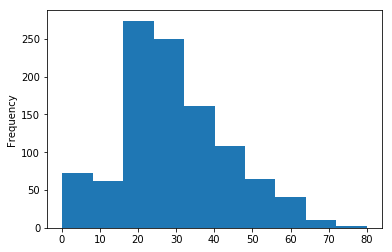

In [4]:
merged.Age.plot.hist()

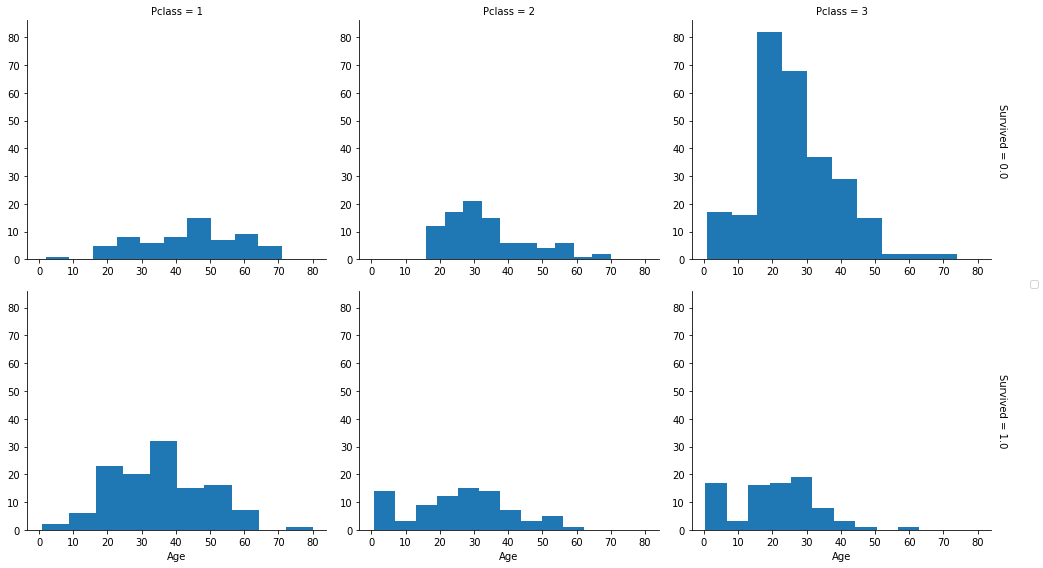

In [5]:
#merged.groupby(['Embarked'])['PassengerId'].count()
g = sns.FacetGrid(merged, col='Pclass',row='Survived',aspect=1.2,size=4,margin_titles=True)
g.map(plt.hist, 'Age')
g.add_legend();

In [6]:
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')

C:\Users\Anderson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [7]:
merged.groupby(['Title'])['Title'].count()

Title
Capt          1
Col           4
Countess      1
Don           1
Dona          1
Dr            8
Jonkheer      1
Lady          1
Major         2
Master       61
Miss        260
Mlle          2
Mme           1
Mr          757
Mrs         197
Ms            2
Rev           8
Sir           1
Name: Title, dtype: int64

In [8]:
merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [9]:
merged.Cabin.fillna(value='X',inplace=True)
merged.Cabin = merged[~merged['Cabin'].isnull()]['Cabin'].apply(lambda x: x[0])

In [10]:
merged.groupby(['Cabin'])['Cabin'].count()

Cabin
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
X    1014
Name: Cabin, dtype: int64

In [11]:
merged.groupby(['Title'])['Age'].mean()

Title
Aristocrat    41.166667
Master         5.482642
Miss          21.824366
Mr            32.252151
Mrs           36.918129
Officer       46.272727
Name: Age, dtype: float64

In [12]:
merged.loc[(merged.Age.isnull())&(merged.Title=='Aristocrat'),'Age']=41
merged.loc[(merged.Age.isnull())&(merged.Title=='Master'),'Age']=9
merged.loc[(merged.Age.isnull())&(merged.Title=='Miss'),'Age']=24
merged.loc[(merged.Age.isnull())&(merged.Title=='Mr'),'Age']=32
merged.loc[(merged.Age.isnull())&(merged.Title=='Officer'),'Age']=46
merged.loc[(merged.Age.isnull())&(merged.Title=='Mrs'),'Age']=37

In [13]:
merged.isnull().any()

Age            False
Cabin          False
Embarked        True
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
Title          False
dtype: bool

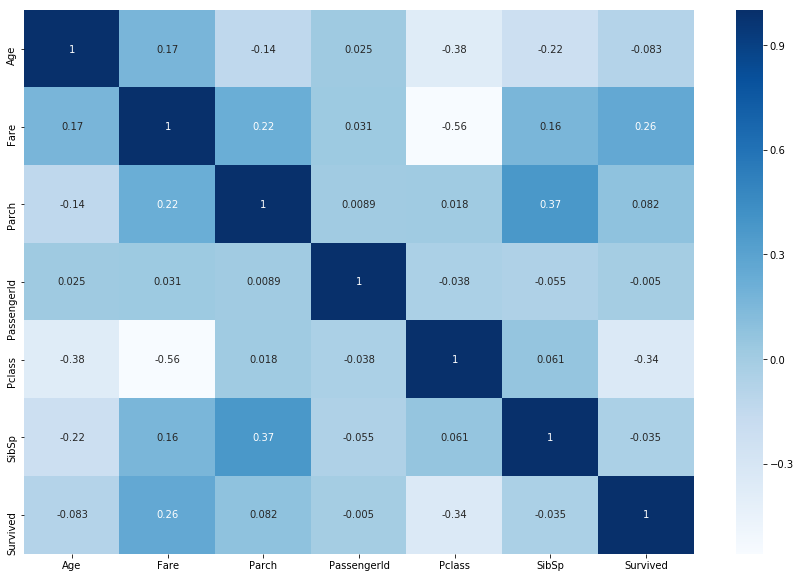

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(merged.corr(),cmap='Blues',annot=True)
plt.show()

In [15]:
merged.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0.0         25.308642
        1.0         28.879828
male    0.0         31.637821
        1.0         27.547431
Name: Age, dtype: float64

In [16]:
#merged['Age'] = merged['Age'].fillna(value=merged.Age.mean())

merged['Embarked'] = merged['Embarked'].fillna(value='S')

In [17]:
def outlier(feature):
    Q1 = np.percentile(feature,25)
    Q3 = np.percentile(feature,75)
    IQR = Q3-Q1
    u,l = (Q3 + (1.5 * IQR)),(Q1 - (1.5 * IQR))
    outliers = feature[((feature < l) | (feature > u))].index.tolist()
    return outliers
print(outlier(merged['Age']))

[11, 33, 54, 78, 94, 96, 116, 170, 195, 232, 252, 268, 275, 280, 305, 326, 366, 438, 456, 469, 483, 487, 493, 545, 555, 570, 587, 625, 630, 644, 659, 672, 684, 694, 745, 755, 803, 829, 831, 851, 2, 13, 48, 69, 81, 96, 114, 142, 152, 179, 193, 201, 213, 236, 250, 281, 305, 307, 343, 354, 356]


In [18]:
merged.shape

(1309, 13)

In [19]:
# Não executar esse bloco
#o_l = outlier(merged['Age'])
#merged.drop(o_l,axis=0,inplace=True)

In [20]:
merged.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [21]:
merged['Sex'].replace({'male':1,'female':0},inplace=True)

In [22]:
df_copy = pd.DataFrame()
df_copy = merged

In [23]:
type(df_copy)
df_copy.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr


In [24]:
v = ['Name','Ticket']
#v = ['Ticket']
df_copy.drop(v,axis=1,inplace=True)

In [25]:
print(df_copy.shape)
df_copy.head()

(1309, 11)


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,X,S,7.2500,0,1,3,1,1,0.0,Mr
1,38.0,C,C,71.2833,0,2,1,0,1,1.0,Mrs
2,26.0,X,S,7.9250,0,3,3,0,0,1.0,Miss
3,35.0,C,S,53.1000,0,4,1,0,1,1.0,Mrs
4,35.0,X,S,8.0500,0,5,3,1,0,0.0,Mr


In [26]:
df_copy['Age'] = df_copy['Age'] / df_copy['Age'].max()
df_copy['Fare'] = df_copy['Fare'] / df_copy['Fare'].max()

In [27]:
ohe_df = pd.get_dummies(df_copy)

In [28]:
ohe_df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Cabin_A,Cabin_B,...,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Title_Aristocrat,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,0.2750,0.014151,0,1,3,1,1,0.0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0.4750,0.139136,0,2,1,0,1,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.3250,0.015469,0,3,3,0,0,1.0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0.4375,0.103644,0,4,1,0,1,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.4375,0.015713,0,5,3,1,0,0.0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [29]:
#print(ohe_df.head())
#print(ohe_df.shape)

#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(ohe_df)
#df = pd.DataFrame(x_scaled)

In [30]:
#pd.plotting.scatter_matrix(df_copy,figsize=(15,10))
#plt.show()
ohe_df.isnull().any()

Age                 False
Fare                False
Parch               False
PassengerId         False
Pclass              False
Sex                 False
SibSp               False
Survived             True
Cabin_A             False
Cabin_B             False
Cabin_C             False
Cabin_D             False
Cabin_E             False
Cabin_F             False
Cabin_G             False
Cabin_T             False
Cabin_X             False
Embarked_C          False
Embarked_Q          False
Embarked_S          False
Title_Aristocrat    False
Title_Master        False
Title_Miss          False
Title_Mr            False
Title_Mrs           False
Title_Officer       False
dtype: bool

Survived
0    240
1    178
Name: Survived, dtype: int64
0.971941638608


Text(0.5,1.05,'Confusion_matrix')

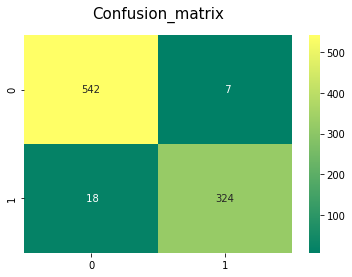

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df_train = ohe_df.iloc[:891, :]
df_test  = ohe_df.iloc[891:, :]

survived = df_train['Survived']
x_train = df_train.drop(["PassengerId","Survived"], axis = 1)
x_test = df_test.drop(["PassengerId","Survived"], axis = 1)

model_RL = RandomForestClassifier(random_state=15)

model_RL.fit(x_train,survived)
predictions = model_RL.predict(x_test).astype(int)
predictions_train = model_RL.predict(x_train).astype(int)

submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':predictions})
submission.to_csv('submission.csv',index=False)

print(submission.groupby(['Survived'])['Survived'].count())
print(accuracy_score(predictions_train,survived))

sns.heatmap(confusion_matrix(survived,predictions_train),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)